In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from hcipy import *
from scipy import ndimage
from scipy import fft
from oah_tools import *

(495, 495)


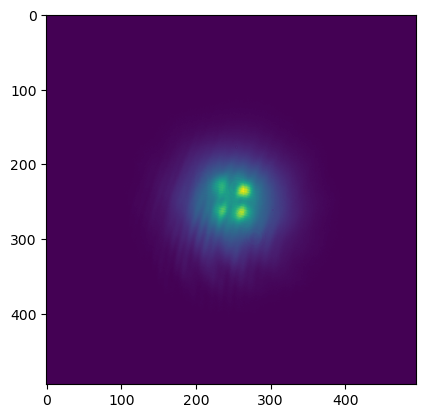

In [24]:
bkgd = fits.getdata('lant2_data_230120/bkgd_0.9968710000000001_avgs100.fits')
ref = fits.getdata('lant2_data_230120/lant_ref_0.9968710000000001_avgs100.fits')-bkgd

lp01_holo = fits.getdata('lant2_data_230120/lp01_holo_0.9968710000000001_avgs100.fits')-bkgd
lp11a_holo = fits.getdata('lant2_data_230120/lp11a_holo_0.9968710000000001_avgs100.fits')-bkgd
lp11b_holo = fits.getdata('lant2_data_230120/lp11b_holo_0.9968710000000001_avgs100.fits')-bkgd
lp21a_holo = fits.getdata('lant2_data_230120/lp21a_holo_0.9968710000000001_avgs100.fits')-bkgd
lp21b_holo = fits.getdata('lant2_data_230120/lp21b_holo_0.9968710000000001_avgs100.fits')-bkgd
lp02_holo = fits.getdata('lant2_data_230120/lp02_holo_0.9968710000000001_avgs100.fits')-bkgd

centerx = 248
centery = 295
crop_width = 495

lp01_crop = lp01_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
lp11a_crop = lp11a_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
lp11b_crop = lp11b_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
lp21a_crop = lp21a_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
lp21b_crop = lp21b_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
lp02_crop = lp02_holo[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref_crop = ref[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(lp01_crop.shape)
plt.imshow(lp21a_crop,vmin=0)

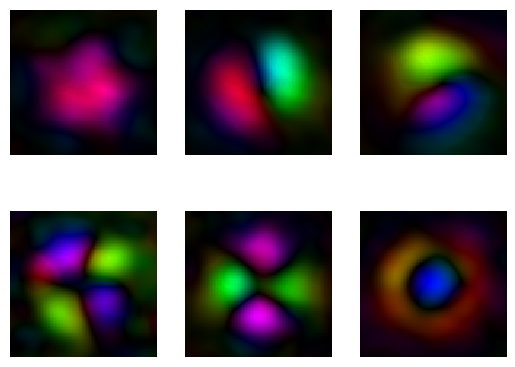

In [22]:
x_starts = 96
y_starts = 280

holos = [lp01_crop,lp11a_crop,lp11b_crop,lp21a_crop,lp21b_crop,lp02_crop]

ret_fields = []
plt.figure()
for n in range(len(holos)):
    ret_field=(retrieve_mode_lant(holos[n],ref_crop,x1=x_starts,y1=y_starts,box_width=57))
    ret_fields.append(ret_field)
    plt.subplot(2,3,n+1)
    imshow_field(ret_field)
    plt.axis('off')

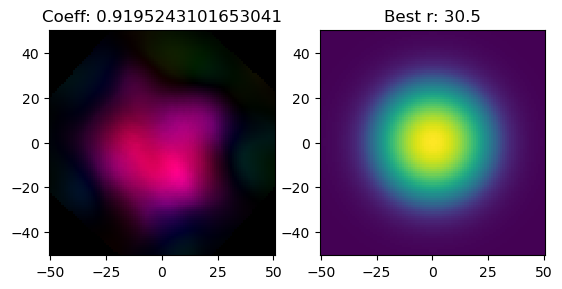

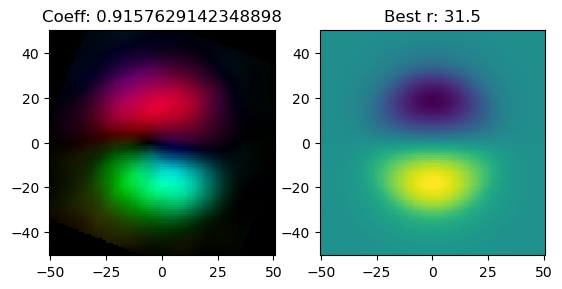

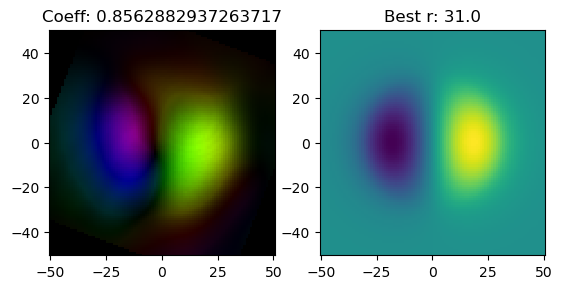

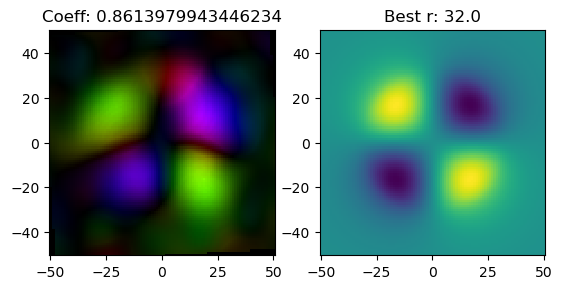

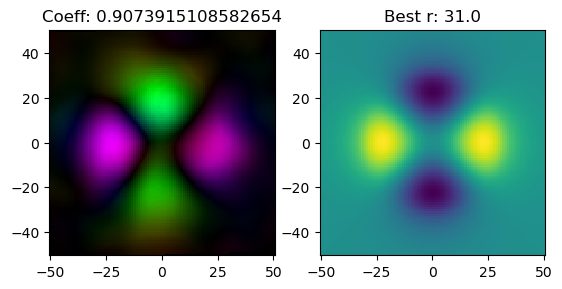

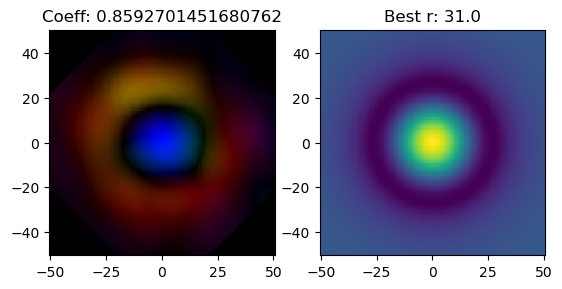

In [23]:
lp21b_ret = ret_fields[0]
recon_map = lp21b_ret.shaped

grid = make_uniform_grid([recon_map.shape[0],recon_map.shape[1]], [recon_map.shape[0],recon_map.shape[1]])

lp_modes = make_lp_modes(grid, 5, 30)

max_coeffs = []
best_rs = []
radii = np.linspace(25,35,21)
for n in range(len(ret_fields)):
    rotated_field, rot_angle, max_coeff = rotate_mode_to_max(ret_fields[n],lp_modes[n],plot=False)
    best_r = find_r(rotated_field,radii,lp_mode=n,V_num=5)
    best_rs.append(best_r)
    lp_modes = make_lp_modes(grid, 5, best_r)
    
    cur_mode = lp_modes[n]
    
    best_coeff = np.abs(np.nansum(np.conj(cur_mode)*rotated_field,axis=None)/np.nansum(np.conj(cur_mode)*cur_mode,axis=None))
    
    max_coeffs.append(best_coeff)

    plt.figure()
    plt.subplot(1,2,1)
    imshow_field(rotated_field)
    plt.title('Coeff: '+ str(best_coeff))
    plt.subplot(1,2,2)
    imshow_field(lp_modes[n])
    plt.title('Best r: '+str(best_r))